# Model interpretations generated for the Toronto images using LIME

In [1]:
import numpy as np 
import pandas as pd 
import os, sys
import matplotlib.pyplot as plt
import matplotlib.image as mplimg
from matplotlib.pyplot import imshow
import gc

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

from keras import layers
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input
from keras.layers import Input, Dense, Activation, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout
from keras.models import Sequential, Model, load_model, model_from_yaml
from keras.optimizers import SGD
from keras.constraints import maxnorm
from keras.callbacks import ModelCheckpoint

import keras.backend as K
from keras.models import Sequential

import lime
from lime import lime_image

import warnings
warnings.simplefilter("ignore", category=DeprecationWarning)


Using TensorFlow backend.


In [2]:
# this will be used to preprocess the datasets
def prepareImages(data, m, dataset, city):
    print("Preparing images")
    X = np.zeros((m, 100, 100, 3))
    count = 0
    
    for fig in data['Image_Id']:
        #load images into images of size 100x100x3
        img = image.load_img(city+"/"+dataset+"/"+fig, target_size=(100, 100, 3))
        x = image.img_to_array(img)
        x = preprocess_input(x)

        X[count] = x
        if (count%500 == 0):
            print("Processing image: ", count+1, ", ", fig)
        count += 1
    
    return X

In [16]:
# this will be used to generate labels for the training set
def model_expl(j):
    fig = test_df.iloc[j]['Image_Id']
    #label = "less safe"
    if sample_prediction[j] == 1:
        label = "More safe"
    else:
        label = "Less safe"
    # displays the image from Test set along with its prediction
    img1 = Image.open("toronto/image/"+fig)
    display(img1)
    print ("Prediction for the Image: "+label)

    explanation = explainer.explain_instance(input_x[j], loaded_model.predict, top_labels=2, num_samples=1000)
    #explanation for the prediction on this image
    temp, mask = explanation.get_image_and_mask(sample_prediction[j], positive_only=False, num_features=10, hide_rest=False)
    plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
    return explanation, temp, mask

In [41]:
# importing the Toronto data for testing the model
toronto_md = pd.read_json("toronto/metadata/metadata.json")
toronto_md.rename(columns = {'_file':'Image_Id'}, inplace = True)
test_df = toronto_md[["Image_Id"]]
test_df = test_df.dropna()

In [6]:
# This chunk of code was added to resolve the error "OSError: image file is truncated" in the below cell
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [7]:
# this will preprocess the test data
X = prepareImages(test_df, test_df.shape[0], "image", "toronto")
X /= 255

Preparing images
Processing image:  1 ,  gsv_0.jpg
Processing image:  501 ,  gsv_512.jpg
Processing image:  1001 ,  gsv_1028.jpg
Processing image:  1501 ,  gsv_1541.jpg
Processing image:  2001 ,  gsv_2066.jpg


In [8]:
from keras.models import Sequential, Model, load_model, model_from_yaml
# Load the model
yaml_file = open('best_model_keras_cnn.yaml', 'r')
loaded_model_yaml = yaml_file.read()
yaml_file.close()
loaded_model = model_from_yaml(loaded_model_yaml)
# load weights into new model
loaded_model.load_weights("best_model_keras_cnn.h5")
print("Loaded model from disk")

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Loaded model from disk


In [9]:
### Predictions on the selected input
input_x = X[0:50]
sample_prediction = loaded_model.predict_classes(input_x)
print(sample_prediction)

[0 0 0 1 1 0 1 0 0 1 1 1 0 1 1 1 0 0 1 1 1 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0
 1 0 1 1 1 1 1 1 0 1 1 1 1]


In [11]:
#%matplotlib inline
#xs = X[0:4]

#n_cols = 2
#n_rows = int(len(xs)/2)
#plt.figure(figsize=(3*n_cols, 5*n_rows))
#plt.figure(figsize=(100, 100))
#for i in range(len(xs)):
#    plt.subplot(2, 2, i+1)
#    plt.imshow(xs[i].reshape(100,100,3), cmap='gray')

In [10]:
explainer = lime_image.LimeImageExplainer()

In [11]:
import skimage
print(skimage.__version__)

0.15.0


In [12]:
from skimage.segmentation import mark_boundaries
from PIL import Image

# Explanation for the prediction

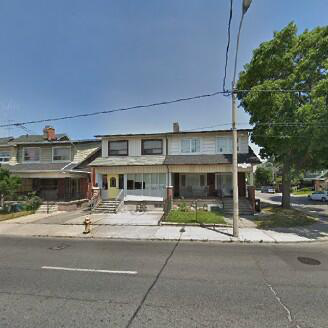

Prediction for the Image: Less safe
CPU times: user 1.08 s, sys: 80 ms, total: 1.16 s
Wall time: 1.36 s


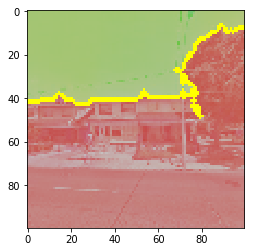

In [23]:
%%time
j = 0
explanation, temp, mask = model_expl(j)

Model has predicted the above image to be perceived as less safe because of electrical wires hanging over the house. These wires are highlighted in green color.

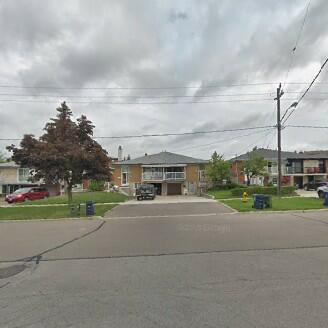

Prediction for the Image: Less safe
CPU times: user 1.1 s, sys: 80 ms, total: 1.18 s
Wall time: 1.35 s


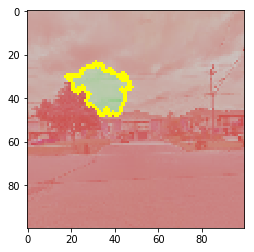

In [22]:
%%time
j = 1
explanation, temp, mask = model_expl(j)

Above image was perceived to be less safe again because of the electrical wires over the house. We believe the wires over the house carry more weightage compared to the wires that are farther away from the house.

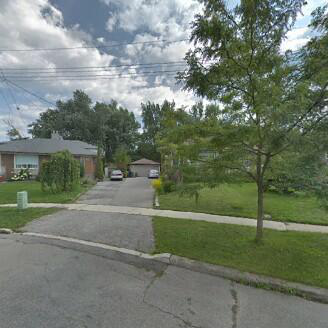

Prediction for the Image: Less safe
CPU times: user 1.14 s, sys: 72 ms, total: 1.21 s
Wall time: 1.37 s


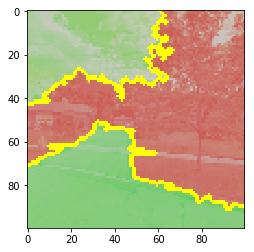

In [21]:
%%time
j = 2
explanation, temp, mask = model_expl(j)

The model has predicted the above image to be perceived as less safe again because of the electrical wires over the house

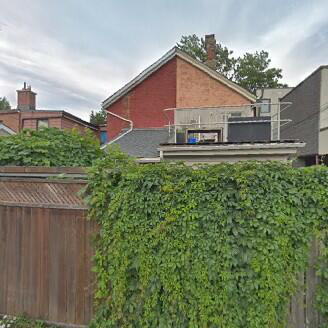

Prediction for the Image: More safe
CPU times: user 1.08 s, sys: 104 ms, total: 1.19 s
Wall time: 1.38 s


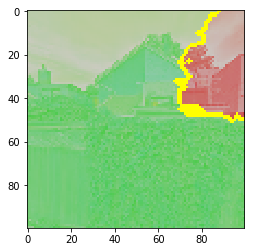

In [20]:
%%time
j = 3
explanation, temp, mask = model_expl(j)

Model has predicted the above image to be perceived as more safe because of the plants and trees in the image.

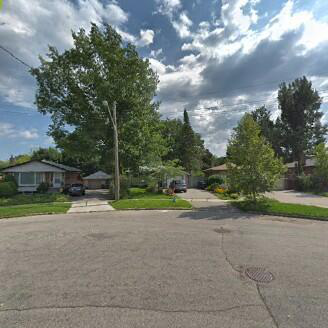

Prediction for the Image: More safe
CPU times: user 1.1 s, sys: 72 ms, total: 1.18 s
Wall time: 1.36 s


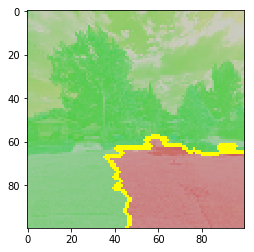

In [19]:
%%time
j = 4
explanation, temp, mask = model_expl(j)

Model has predicted the above image to be perceived as more safe because of the plants and trees in the image.

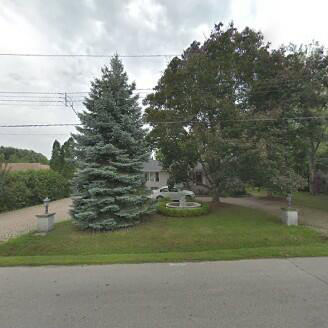

Prediction for the Image: More safe
CPU times: user 1.14 s, sys: 76 ms, total: 1.22 s
Wall time: 1.37 s


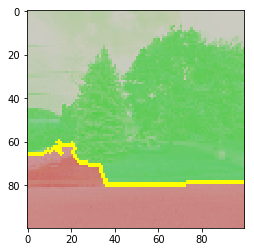

In [24]:
%%time
j = 6
explanation, temp, mask = model_expl(j)

Model has predicted the above image to be perceived as More safe because of the plants and trees

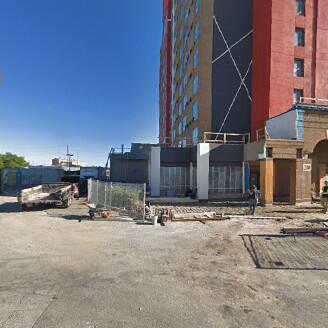

Prediction for the Image: Less safe
CPU times: user 1.17 s, sys: 60 ms, total: 1.23 s
Wall time: 1.36 s


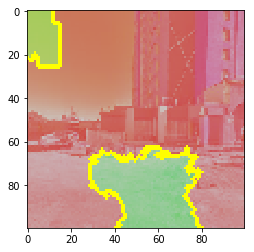

In [25]:
%%time
j = 7
explanation, temp, mask = model_expl(j)

The above image looks like a construction site with unpaved road, so the model has predicted image to be perceived as less safe.

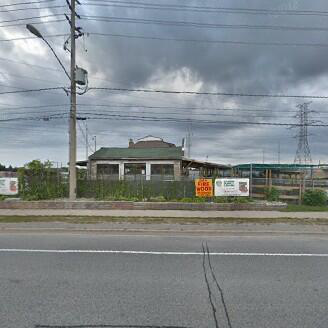

Prediction for the Image: Less safe
CPU times: user 1.23 s, sys: 52 ms, total: 1.28 s
Wall time: 1.47 s


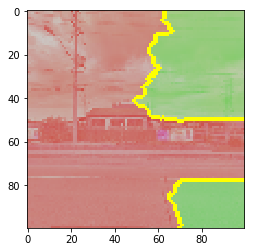

In [26]:
%%time
j = 8
explanation, temp, mask = model_expl(j)

Model has predicted the above image to be perceived as less safe because of the high tension wires over the building

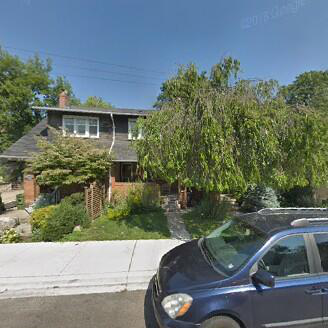

Prediction for the Image: More safe
CPU times: user 1.15 s, sys: 68 ms, total: 1.22 s
Wall time: 1.38 s


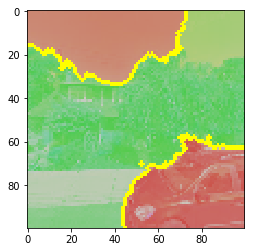

In [27]:
%%time
j = 9
explanation, temp, mask = model_expl(j)

Model has predicted the above image to be more safe because of the plants and trees

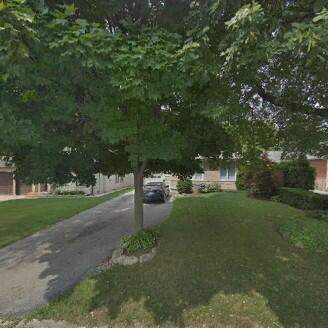

Prediction for the Image: More safe
CPU times: user 1.08 s, sys: 68 ms, total: 1.15 s
Wall time: 1.34 s


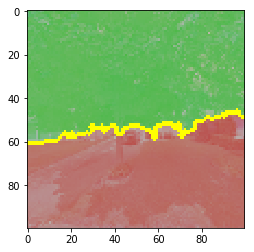

In [28]:
%%time
j = 10
explanation, temp, mask = model_expl(j)

Model has predicted the above image to be perceived as more safe because of the tree in the image. We can also note that 
the tree's shadow actually contributed towards less safe perception.

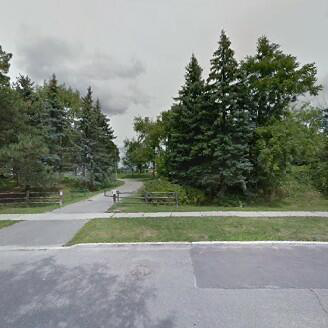

Prediction for the Image: More safe
CPU times: user 1.1 s, sys: 64 ms, total: 1.17 s
Wall time: 1.36 s


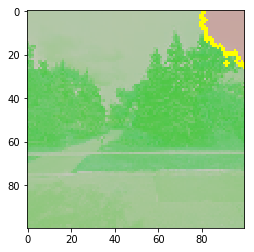

In [29]:
%%time
j = 11
explanation, temp, mask = model_expl(j)

Model has predicted the above image to be perceived as more safe because of the plants and trees in the image

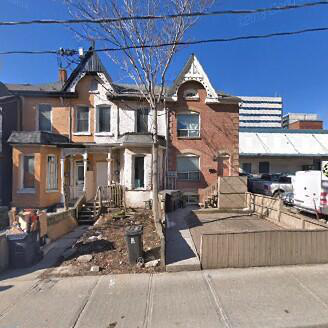

Prediction for the Image: More safe
CPU times: user 1.15 s, sys: 80 ms, total: 1.23 s
Wall time: 1.37 s


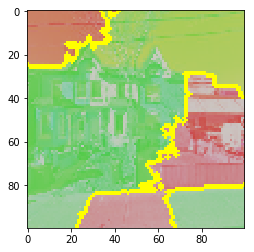

In [32]:
%%time
j = 13
explanation, temp, mask = model_expl(j)

In [ ]:
Model has predicted the above image to be perceived as more safe. Lime has highlighted parts of the pavement, house
and the tree before the house as contributing towards a more safe perception. Adjacent to the house, it looks like a
parking lot with multiple vehicles parked and is highlighted as contributing towards less safe perception. Also portion
of the image with wire is highlighted as contributing towards less safe perception.

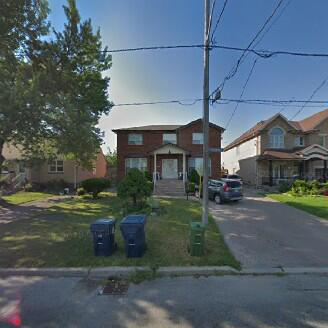

Prediction for the Image: More safe


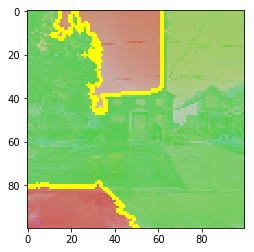

In [34]:
j = 14
explanation, temp, mask = model_expl(j)

In [ ]:
Model has predicted the above image to be perceived as more safe. Plants and trees have contributed towards a more safe 
perception while the electrical wires have contributed towards a less safe perception.

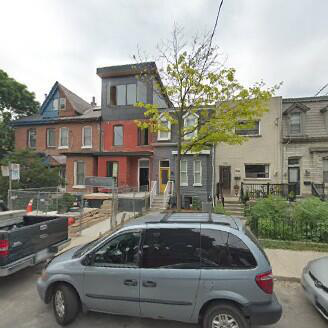

Prediction for the Image: More safe


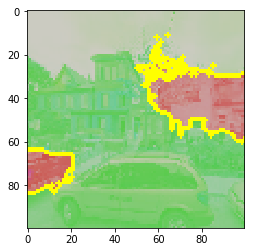

In [35]:
j = 15
explanation, temp, mask = model_expl(j)

In [ ]:
Model has predicted the above image to be perceived as more safe. Brightly colored houses are perceived to be more safe and
dull colored houses are perceived to be less safe. Among the vehicles in the picture, the hatchback has contributed towards 
more safe and the pick-up truck has contributed towards less safe perception.

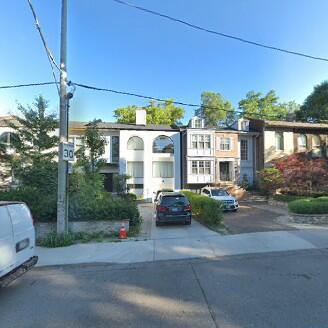

Prediction for the Image: Less safe


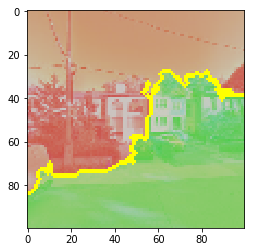

In [36]:
j = 16
explanation, temp, mask = model_expl(j)

Model has predicted the above image to be perceived as less safe. Houses on the right side of the image seems to be older and have contributed to less safe perception while the house on the left seems to be comparatively new.

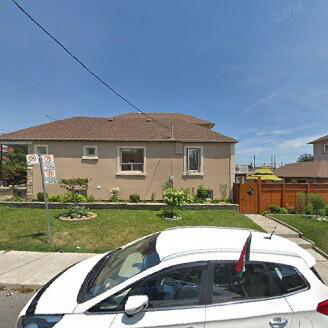

Prediction for the Image: Less safe


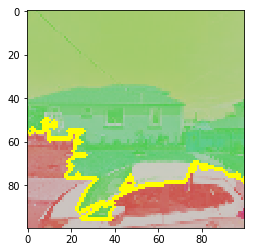

In [37]:
j = 17
explanation, temp, mask = model_expl(j)

Model has predicted the above image to be perceived as less safe because of the wire over the house

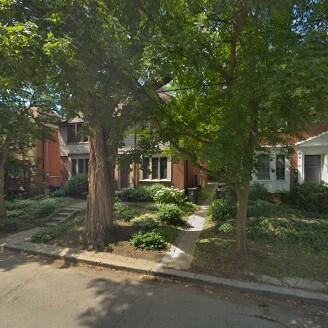

Prediction for the Image: More safe


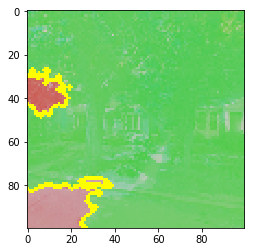

In [38]:
j = 18
explanation, temp, mask = model_expl(j)

Model has predicted the above image to be perceived as more safe because of the trees.

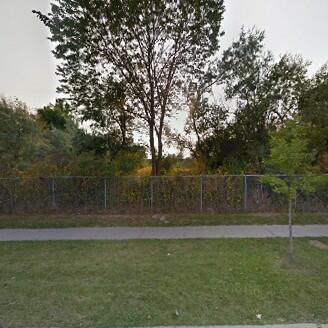

Prediction for the Image: More safe


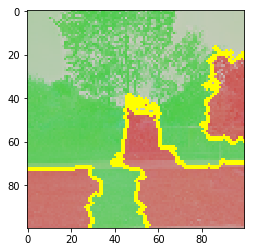

In [39]:
j = 19
explanation, temp, mask = model_expl(j)

Model has predicted the above image to be perceived as more safe because of the trees and plants.

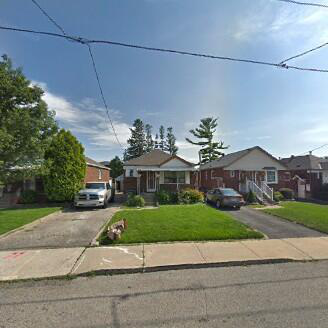

Prediction for the Image: More safe


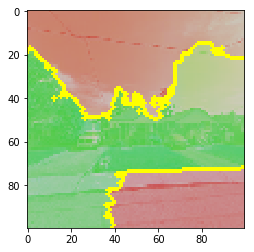

In [40]:
j = 20
explanation, temp, mask = model_expl(j)

Model has predicted the above image to be perceived as more safe. Houses, plants and the lawn in front of the house has contributed towards more safe perception and the electrical wires have contributed towards less safe perception.